In [3]:
raw_data <- read.csv("SSL_RAT_RACE_Code_Full.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 290208

In [4]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [5]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 290123

In [6]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
500,1,20-30,0,1,4,1,1,1.0,1,0
500,1,less than 20,1,2,2,1,7,0.2,1,0
500,1,20-30,4,3,0,1,0,-1.1,0,1
500,1,less than 20,1,2,6,0,0,0.0,0,0
500,1,less than 20,1,1,4,1,1,-0.3,2,0
500,1,less than 20,1,2,6,1,0,-0.4,1,0


In [7]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [8]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,207800,282.4735,0.1348997
1,82323,269.8436,0.1968091


In [9]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,207800,191951.8,265.2372
1,82323,216843.3,383.1416


In [10]:
# T-test without PSM for SSL_SCORE and SEX_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 52.933, df = 163540, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.16225 13.09756
sample estimates:
mean in group 0 mean in group 1 
       282.4735        269.8436 


In [11]:
# T-test without PSM for SSL_SCORE_RANK and SEX_CODE_CD
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -53.416, df = 165110, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25804.83 -23978.16
sample estimates:
mean in group 0 mean in group 1 
       191951.8        216843.3 


In [12]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST+PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [13]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All        207800   82323
Matched     82323   82323
Unmatched  125477       0
Discarded       0       0


In [14]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

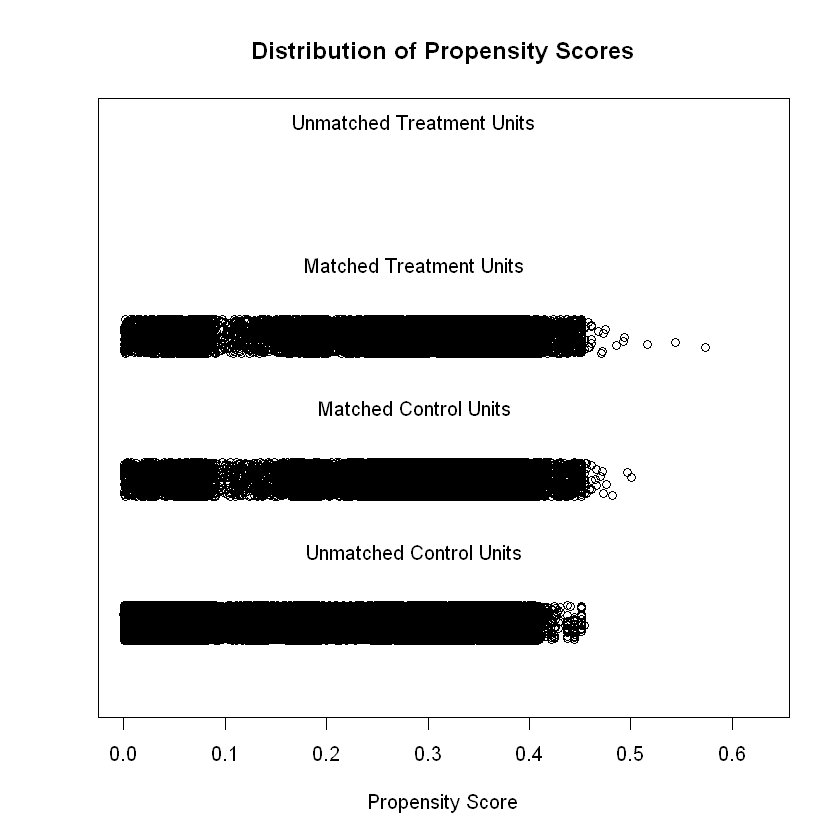

In [15]:
plot(mod_match, type = "jitter")

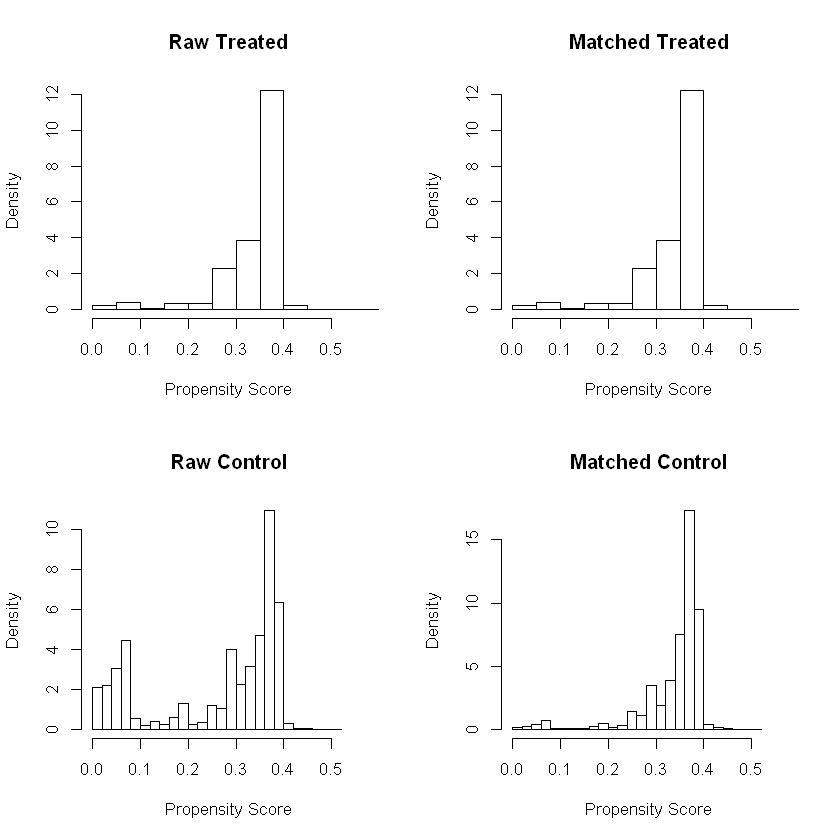

In [16]:
plot(mod_match, type = "hist")

In [17]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
3,500,1,20-30,4,3,0,1,0,-1.1,0,1,1.439827e-05,1
24,500,1,less than 20,0,1,12,1,0,0.4,1,1,1.649998e-05,1
44,500,1,less than 20,1,1,5,1,1,-4.1,1,0,9.814015e-05,1
51,500,1,less than 20,0,0,2,1,14,-2.9,0,0,1.136495e-03,1
90,500,1,20-30,0,9,1,1,0,1.0,0,1,7.568827e-06,1
96,500,1,less than 20,2,2,1,1,16,-0.7,0,0,1.687947e-05,1


In [18]:
# Doing T - test on matched records
options(warn=-1)
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [19]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)

In [20]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 2.8344, df = 164580, p-value = 0.004592
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2458712 1.3480698
sample estimates:
mean in group 0 mean in group 1 
       270.6406        269.8436 


In [21]:
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -3.3087, df = 164570, p-value = 0.0009376
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2885.5386  -738.6592
sample estimates:
mean in group 0 mean in group 1 
       215031.2        216843.3 
